In [237]:
import pandas as pd
import numpy as np

pd.set_option('display.max_column', None)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#f6f6f6'

In [238]:
# Load the data from csv file to the Pandas dataframe as
train = pd.read_csv('./train.csv', encoding = 'unicode_escape', index_col= 'PassengerId')
train.columns = [column.lower() for column in train.columns]

Y_train = train['survived']

print(train.shape)
print(train.columns) 

(100000, 11)
Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


In [239]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   survived  100000 non-null  int64  
 1   pclass    100000 non-null  int64  
 2   name      100000 non-null  object 
 3   sex       100000 non-null  object 
 4   age       96708 non-null   float64
 5   sibsp     100000 non-null  int64  
 6   parch     100000 non-null  int64  
 7   ticket    95377 non-null   object 
 8   fare      99866 non-null   float64
 9   cabin     32134 non-null   object 
 10  embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


# Context

In [241]:
# Data quality assessment
    # 1. Check the %null values in data
    # 2. Filling missing values
    # 3. Change datatypes if required
    # 4. Outliers
# Data exploration
    # 1. Total Survival
    # 2. Age & Survival
    # 3. Family sizes (sibsp and parch) & Survival
    # 4. Class, embarked & Survival
    # 5. Fare & Survival
    # 6. Cabin??
# Summary

# Data quality assessment

In [242]:
train_df = train.copy()

In [243]:
# Check the %null values in data
res_1 = train_df.isnull().sum()/len(train_df)*100

res_1  # We can see that columns "age", "ticket", "fare", "cabin" and "embarked" have null values

survived     0.000
pclass       0.000
name         0.000
sex          0.000
age          3.292
sibsp        0.000
parch        0.000
ticket       4.623
fare         0.134
cabin       67.866
embarked     0.250
dtype: float64

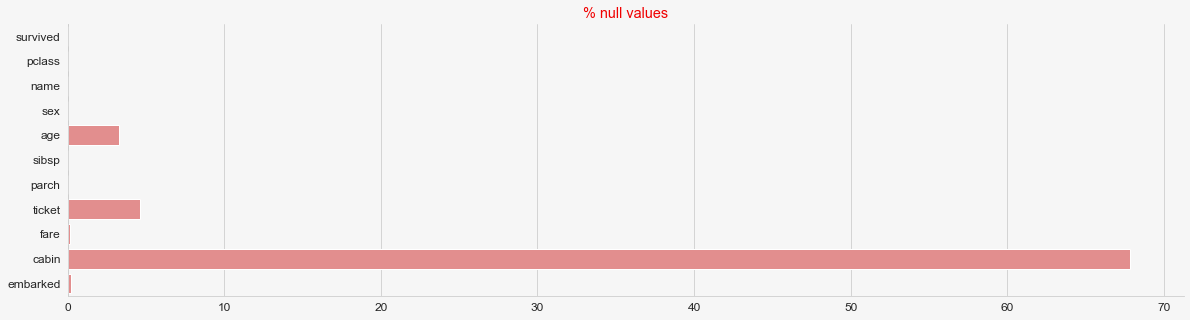

In [244]:
sns.barplot(x = res_1.values, y = list(res_1.index),   color = '#F08080')
plt.title('% null values', color = '#F00000')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

In [245]:
# Filling 'cabin' values
# 67% values are missing here, so fill it with 'None' if the value is not present
train_df['cabin'] = train_df['cabin'].fillna('None')

for col in ['cabin']:
    print(train_df[col].value_counts())

None      67866
C19828        6
B18148        5
C9767         5
A9127         5
          ...  
C7208         1
A5788         1
C5607         1
D14672        1
D17243        1
Name: cabin, Length: 26993, dtype: int64


In [246]:
train_df['cabintype'] = train_df['cabin'].str[0]
train_df['cabintype'].value_counts()

N    67866
C    11825
B     7439
A     6307
D     3637
E     1749
F      663
G      482
T       32
Name: cabintype, dtype: int64

In [247]:
# Fill 'age' and 'fare' value with their mean value
for col in ['age', 'fare']:
    train_df[col] = train_df[col].fillna(round(train_df[col].mean(), 0))

# Fill 'embarked' and 'ticket' values with their mode value
for col in ['embarked', 'ticket']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Verify there are no null values
train_df.isnull().sum()/len(train_df)*100

survived     0.0
pclass       0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
cabintype    0.0
dtype: float64

In [248]:
# We will check %unique values in column

feature_cols = train_df.drop(['survived'], axis=1).columns

# Getting all the data that are not of "object" type.
num_cols = train_df[feature_cols].select_dtypes(include=['int64','float64']).columns
cat_cols = train_df[feature_cols].select_dtypes(exclude=['int64','float64']).columns

numerical = ['age', 'fare']
categorical = train_df[feature_cols].drop(columns=numerical).columns

# print(len(numerical), len(categorical))

for col in cat_cols:
    print(f"{col} : {round(train_df[col].nunique()/len(train_df)*100, 3)}")


name : 92.144
sex : 0.002
ticket : 75.331
cabin : 26.993
embarked : 0.003
cabintype : 0.009


In [249]:
# 'name' and 'ticket' columns have more than 92% & 75% unique values respectively. 
# They don't give any information to the model just as is.

train_df.drop(['name', 'ticket'], axis = 1, inplace = True)
train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,cabintype
PassengerId,,,,,,,,,,
0,1,1,male,38.00,2,0,27.14,C12239,S,C
1,0,3,male,38.00,0,0,13.35,None,S,N
2,0,3,male,0.33,1,2,71.29,None,S,N
3,0,3,male,19.00,0,0,13.04,None,S,N
4,1,3,male,25.00,0,0,7.76,None,S,N


In [250]:
# Check column datatype with a sample datatype, change datatypes if required
res_2 = pd.concat([train_df.iloc[0], train_df.dtypes], axis = 1)
res_2.columns = ['sample', 'dtype']

res_2 # Here we see that the data type of sample matches with the datatype of the column. Hence no need to change column datatype

,sample,dtype
survived,1,int64
pclass,1,int64
sex,male,object
age,38.0,float64
sibsp,2,int64
parch,0,int64
fare,27.14,float64
cabin,C12239,object
embarked,S,object
cabintype,C,object


In [251]:
# Outliers.
def drop_outliers(df,features):
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 3
        # detect outlier and their indeces
        df.drop(df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index, inplace=True)
    return df

train_df = drop_outliers(train_df, ['age', 'sibsp', "parch"])

print(train_df.shape)

(98783, 10)


# Data exploration

In [252]:
train_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,98783.000000,98783.000000,98783.000000,98783.000000,98783.000000,98783.000000
mean,0.428110,2.105990,38.374085,0.368687,0.403106,43.929000
std,0.494807,0.838285,17.985564,0.739065,0.761157,69.600716
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.020000
50%,0.000000,2.000000,38.000000,0.000000,0.000000,24.440000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.550000
max,1.000000,3.000000,87.000000,4.000000,4.000000,744.660000


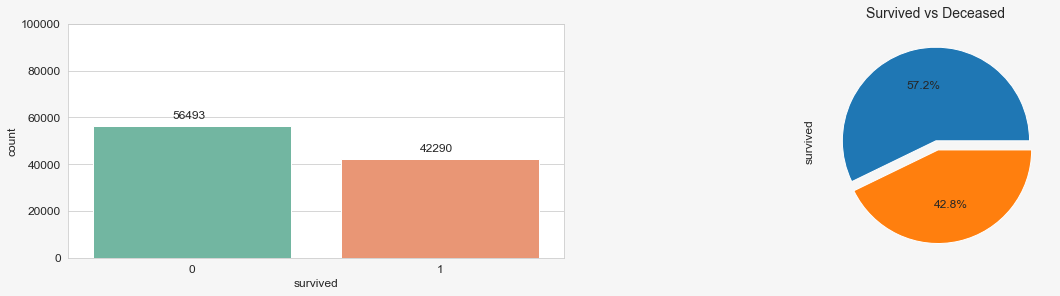

In [253]:
#
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.title('Survived vs Deceased', fontsize= 14)
plt.xticks([0,1], ['Deceased', 'Survived'])

ax[0].set_xlabel("Status", fontsize= 12)
ax[0].set_ylabel("PassangersID", fontsize= 12)
ax[0].set_ylim(0, 100000)
#ax[0].set_xticks([0,1], ['Deceased', 'Survived'])

plt.subplots_adjust(top=0.45, wspace=0.25) 

sns.countplot(x='survived', data=train_df, palette="Set2", ax=ax[0])

for p in ax[0].patches:
    ax[0].annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+3000))

train_df['survived'].value_counts().plot.pie(explode=[0,0.1], labels = ['',''], autopct='%1.1f%%', ax=ax[1])

#ax.set_legend(labels=['Deceased', 'Survived'])

plt.show()

# Научиться располагать графики рядом...

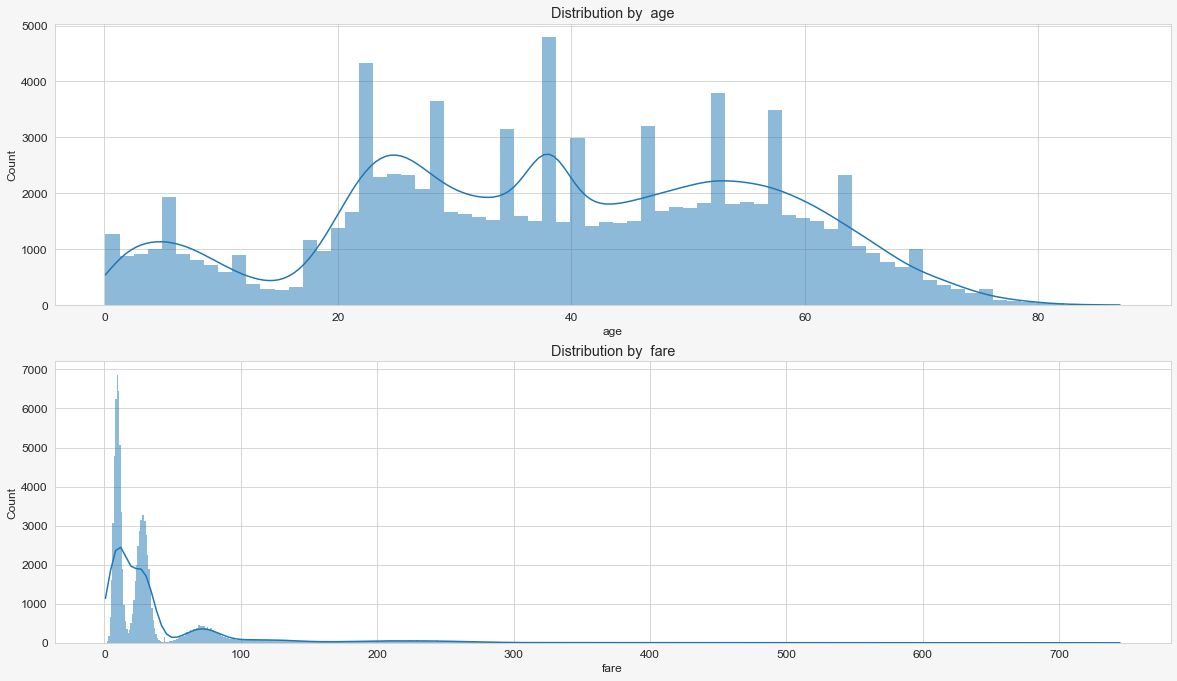

In [254]:
plt.figure(figsize=(20,20))

features_num = ['age', 'fare']

for i, col in enumerate(features_num):    
    plt.subplot(2, 1, i + 1)
    plt.subplots_adjust(bottom=0.45, hspace=0.20) 
    plt.title('Distribution by  ' + col)
    sns.histplot(train_df.loc[:,col], kde=True, linewidth=0, palette='Set2')

plt.show()

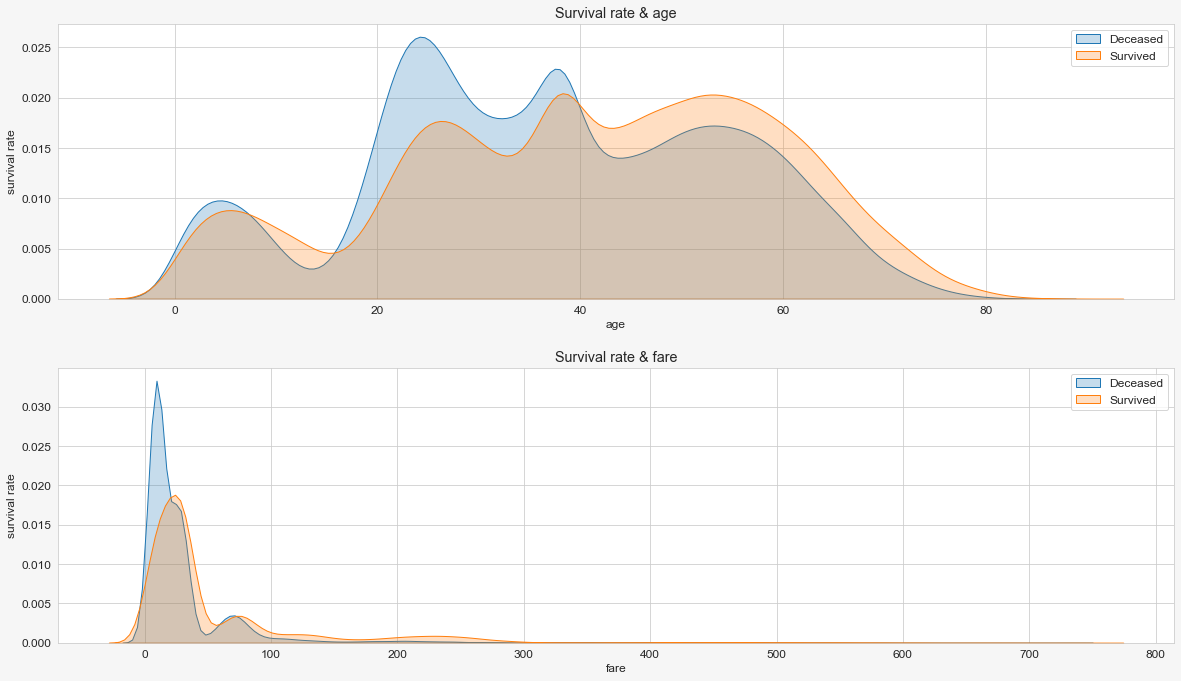

In [255]:
plt.figure(figsize=(20,20))

for i, col in enumerate(features_num):    
    plt.subplot(2, 1, i + 1)
    plt.subplots_adjust(bottom=0.45, hspace=0.25)
    sns.kdeplot(train_df.loc[(train_df['survived'] == 0), col], label = 'Deceased', shade = True)
    sns.kdeplot(train_df.loc[(train_df['survived'] == 1), col], label = 'Survived', shade = True)
    plt.ylabel('survival rate')
    plt.title('Survival rate & ' + col)
    plt.legend()
plt.show()

In [256]:
ageb_order = ['[0, 10]', '(10, 18]', '(18, 40]', '(40, 70]', '(70, 100]']
train_df['agebin'] = pd.cut(train_df['age'], 
    bins=[0, 10, 18, 40, 70, 100], 
    labels=ageb_order, 
    include_lowest=True)
print(train_df['agebin'].value_counts())

fareb_order = ['(0, 20]', '(20, 40]', '(40, 60]', '(60, 80]', '(80, 100]', '(100, 200]', '(200, 300]', '(300, 1000]']
train_df['farebin'] = pd.cut(train_df['fare'],
    bins=[0, 20, 40, 60, 80, 100, 200, 300, 1000],
    labels=fareb_order,
    include_lowest=True)
print(train_df['farebin'].value_counts())

(40, 70]     43077
(18, 40]     41426
[0, 10]       9027
(10, 18]      3339
(70, 100]     1914
Name: agebin, dtype: int64
(0, 20]        43183
(20, 40]       34055
(60, 80]        7214
(100, 200]      4792
(200, 300]      3453
(80, 100]       2942
(40, 60]        1785
(300, 1000]     1359
Name: farebin, dtype: int64


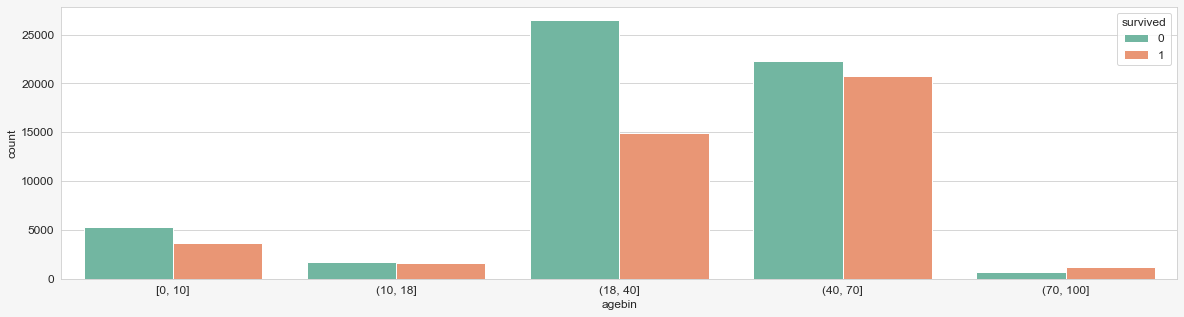

In [257]:
sns.countplot(data = train_df, x = 'agebin', hue='survived', palette = 'Set2', order=list(ageb_order))

plt.show()

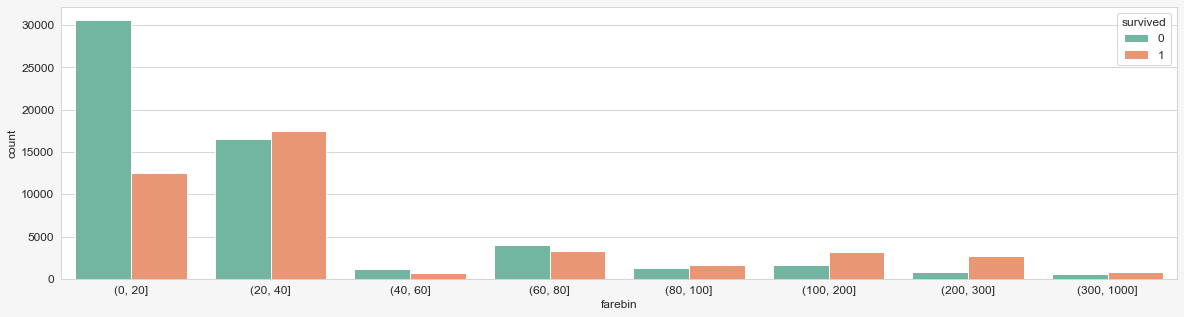

In [258]:

sns.countplot(data = train_df, x = 'farebin', hue='survived', palette = 'Set2', order=list(fareb_order))

plt.show()

In [259]:
train_df['survived'].groupby(train_df['farebin']).value_counts(normalize = True)

farebin      survived
(0, 20]      0           0.708936
             1           0.291064
(20, 40]     1           0.513170
             0           0.486830
(40, 60]     0           0.617367
             1           0.382633
(60, 80]     0           0.551151
             1           0.448849
(80, 100]    1           0.569680
             0           0.430320
(100, 200]   1           0.661102
             0           0.338898
(200, 300]   1           0.781350
             0           0.218650
(300, 1000]  1           0.575423
             0           0.424577
Name: survived, dtype: float64

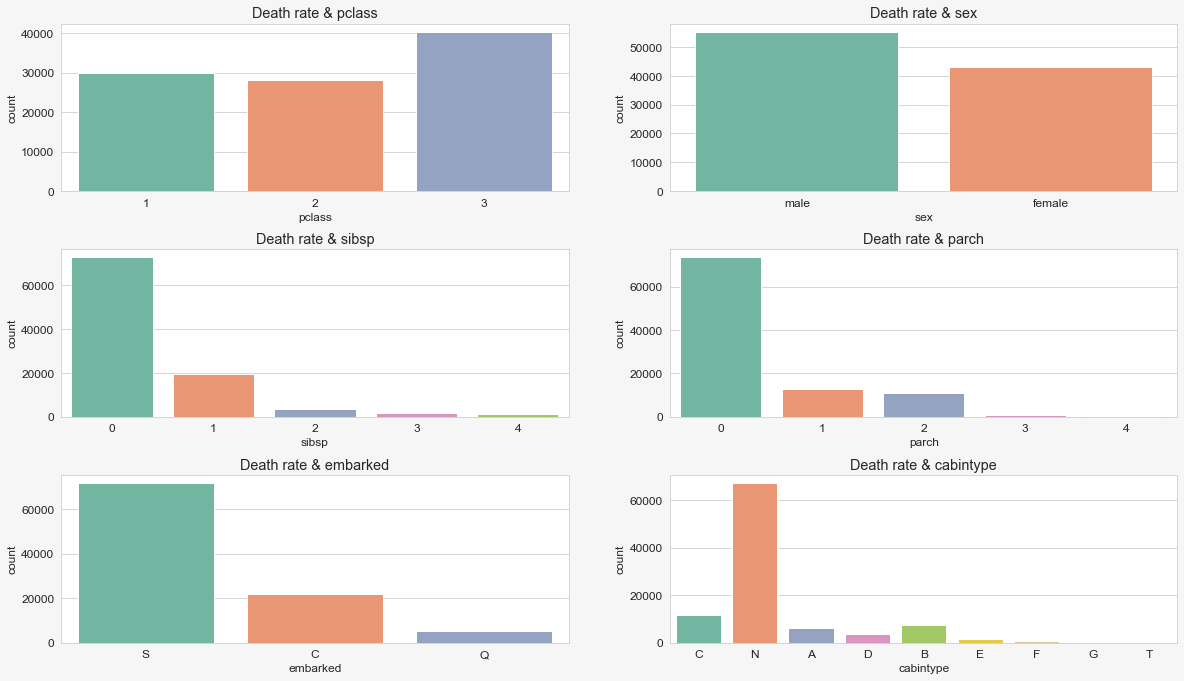

In [260]:
features_disc = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'cabintype']

plt.figure(figsize=(20, 20))

for i, col in enumerate(features_disc):    
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(bottom=0.45, hspace=0.35)
    sns.countplot(data = train_df, x = col, palette = 'Set2')
    plt.ylabel('count')
    plt.title('Death rate & ' + col)

plt.show()

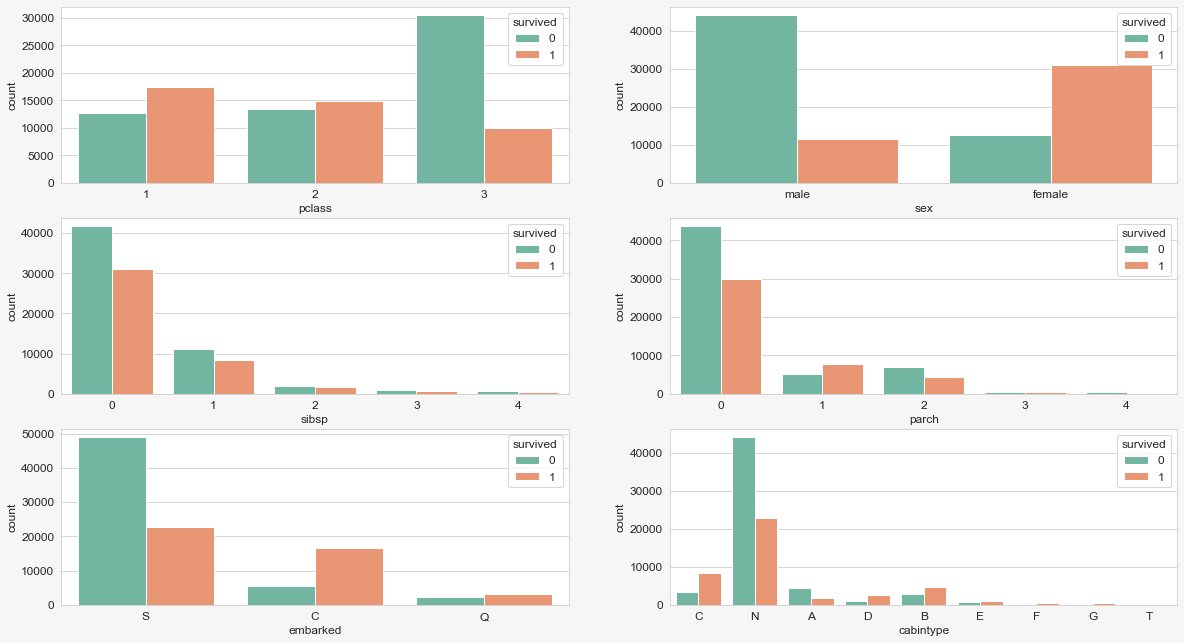

In [261]:
plt.figure(figsize=(20, 11))

for i, col in enumerate(features_disc):    
    plt.subplot(3, 2, i + 1)
    sns.countplot(data = train_df, x = col, hue='survived', palette = 'Set2')
    plt.ylabel('count')

plt.show()

# Summary